In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as ppl

In [2]:
G = nx.DiGraph()

In [3]:
G.add_edge('1','2', capacity=80.0)
G.add_edge('1','3', capacity=70.0)
G.add_edge('1','4', capacity=70.0)
G.add_edge('2','5', capacity=40.0)
G.add_edge('3','5', capacity=50.0)
G.add_edge('3','6', capacity=30.0)
G.add_edge('4','6', capacity=50.0)
G.add_edge('5','7', capacity=40.0)
G.add_edge('6','7', capacity=70.0)

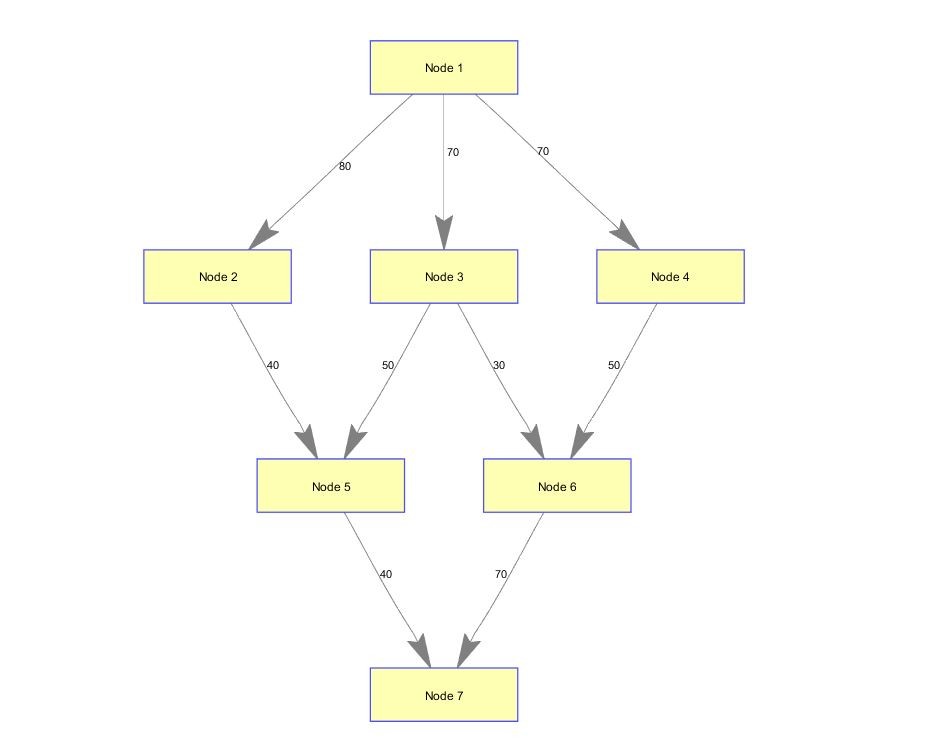

In [4]:
from IPython.display import Image
Image(filename='network.png') 

In [5]:
flow_value, flow_dict = nx.maximum_flow(G, '1', '7')
flow_value

110.0

In [6]:
cut_value, partition = nx.minimum_cut(G, '1', '7')
reachable, non_reachable = partition
reachable

{'1', '2', '3', '4', '5', '6'}

In [7]:
non_reachable

{'7'}

In [8]:
partition

({'1', '2', '3', '4', '5', '6'}, {'7'})

### This set tells us that the nodes has been partition into two equals sets with s ={1,2,3,4,5,6} and t = {7}

In [9]:
cutset = set()
for u, nbrs in ((n, G[n]) for n in reachable):cutset.update((u, v) for v in nbrs if v in non_reachable)
print(sorted(cutset))
cut_value == sum(G.edge[u][v]['capacity'] for (u, v) in cutset)
cut_value


[('5', '7'), ('6', '7')]


110.0

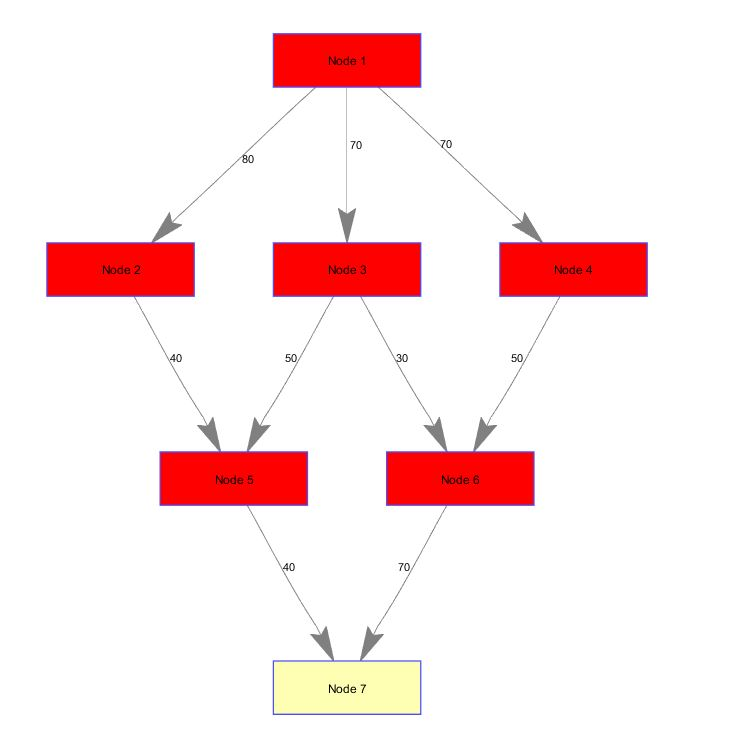

In [10]:
from IPython.display import Image
Image(filename='min-cut.jpeg') 

### Indeed, the sum of the capacities of these edges [('5', '7'), ('6', '7')] is equal to the maximum flow 110.0
### The red nodes and the yellow nodes indicates the partition corresponding to the min-cut

In [11]:
from networkx.algorithms.flow import shortest_augmenting_path

cut_value == nx.minimum_cut(G, '1', '7',flow_func=shortest_augmenting_path)[0]
cut_value

110.0

### Alternative way of doing the same thing but using shortest augmenting path

In [12]:
import networkx as nx
%matplotlib inline

In [13]:
G = nx.DiGraph()

In [14]:
G.add_node(1)
G.add_node(2)
G.add_node(3)

In [15]:
G.add_edges_from([(1,2),(1,3),(2,3)])

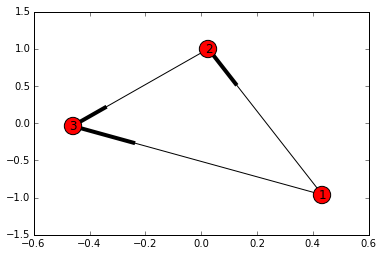

In [16]:
nx.draw_networkx(G)

In [17]:
import numpy as np
import pandas as pd
%matplotlib inline



In [18]:
nx.DiGraph()

In [19]:
G.add_node(1)
G.add_node(2)
G.add_node(3)

In [20]:
G.add_edges_from([(1,2),(1,3),(2,3)])

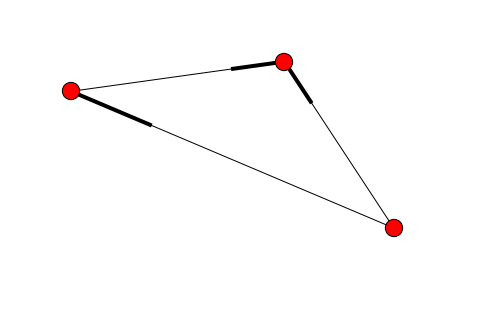

In [21]:
nx.draw(G)

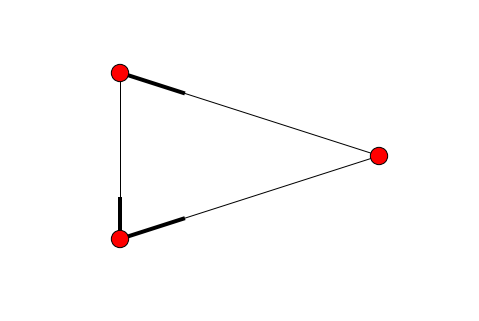

In [22]:
nx.draw_circular(G)

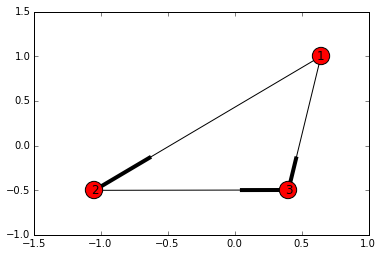

In [23]:
nx.draw_networkx(G)

In [24]:
nx.DiGraph(G)

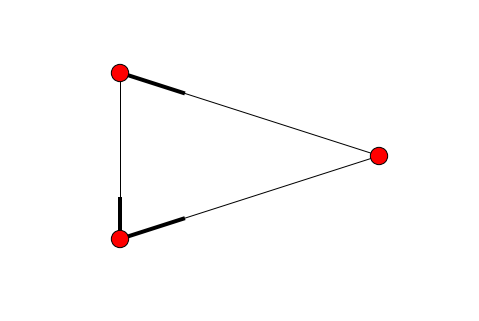

In [25]:
nx.draw_shell(G)

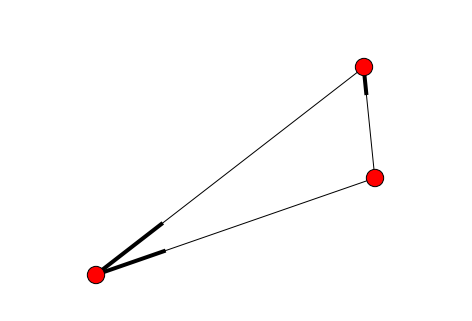

In [26]:
nx.draw_random(G)

In [27]:
import networkx as nx


In [28]:
G = nx.Graph()

In [29]:
G.add_cycle([(1,2),(3,4)])

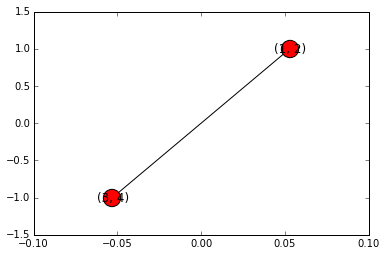

In [30]:
nx.draw_networkx(G)

In [31]:
G.add_cycle([(1,4),(4,2)])

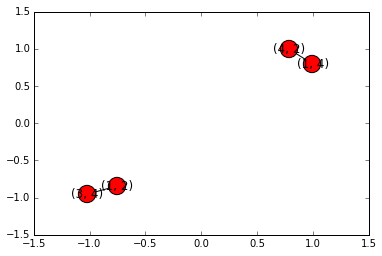

In [32]:
nx.draw_networkx(G)

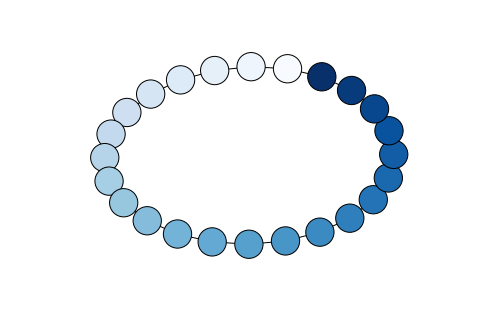

In [33]:
try:
    import matplotlib.pyplot as plt
except:
    raise
import networkx as nx


G=nx.cycle_graph(24)
pos=nx.spring_layout(G,iterations=200)
nx.draw(G,pos,node_color=range(24),node_size=800,cmap=plt.cm.Blues)
plt.savefig("node_colormap.png") # save as png
plt.show() # display


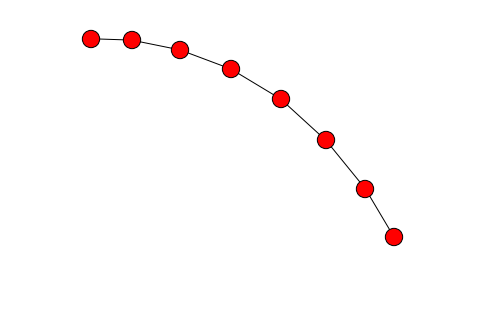

In [34]:
"""
Draw a graph with matplotlib.
You must have matplotlib for this to work.
"""
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.path_graph(8)
nx.draw(G)
plt.savefig("simple_path.png") # save as png
plt.show() # display

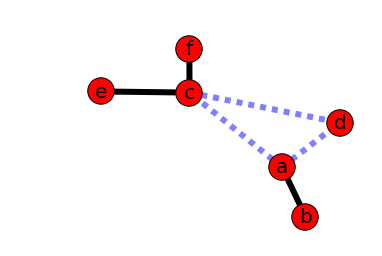

In [35]:
#Edge Colormap
"""
An example using Graph as a weighted network.
"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.Graph()

G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('c','d',weight=0.1)
G.add_edge('c','e',weight=0.7)
G.add_edge('c','f',weight=0.9)
G.add_edge('a','d',weight=0.3)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

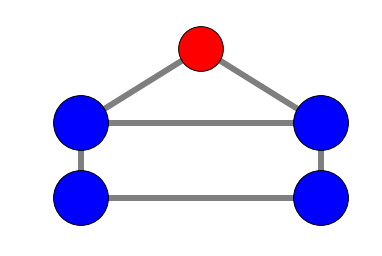

In [36]:
#House With Colors
"""
Draw a graph with matplotlib.
You must have matplotlib for this to work.
"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.house_graph()
# explicitly set positions
pos={0:(0,0),
     1:(1,0),
     2:(0,1),
     3:(1,1),
     4:(0.5,2.0)}

nx.draw_networkx_nodes(G,pos,node_size=2000,nodelist=[4])
nx.draw_networkx_nodes(G,pos,node_size=3000,nodelist=[0,1,2,3],node_color='b')
nx.draw_networkx_edges(G,pos,alpha=0.5,width=6)
plt.axis('off')
plt.savefig("house_with_colors.png") # save as png
plt.show() # display


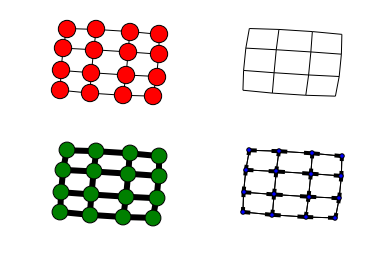

In [37]:
#Four Grids
"""
Draw a graph with matplotlib.
You must have matplotlib for this to work.
"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2004-2015
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.grid_2d_graph(4,4)  #4x4 grid

pos=nx.spring_layout(G,iterations=100)

plt.subplot(221)
nx.draw(G,pos,font_size=8)

plt.subplot(222)
nx.draw(G,pos,node_color='k',node_size=0,with_labels=False)

plt.subplot(223)
nx.draw(G,pos,node_color='g',node_size=250,with_labels=False,width=6)

plt.subplot(224)
H=G.to_directed()
nx.draw(H,pos,node_color='b',node_size=20,with_labels=False)

plt.savefig("four_grids.png")
plt.show()

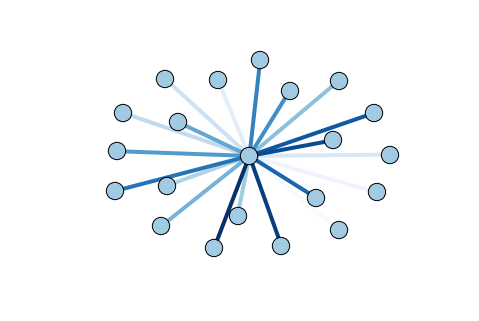

In [38]:
"""
Draw a graph with matplotlib, color edges.
You must have matplotlib>=87.7 for this to work.
"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.star_graph(20)
pos=nx.spring_layout(G)
colors=range(20)
nx.draw(G,pos,node_color='#A0CBE2',edge_color=colors,width=4,edge_cmap=plt.cm.Blues,with_labels=False)
plt.savefig("edge_colormap.png") # save as png
plt.show() # display

In [ ]:
#Circular Tree

import networkx as nx
import matplotlib.pyplot as plt

try:
    from networkx import graphviz_layout 
except ImportError:
    raise ImportError("This example needs Graphviz and either PyGraphviz or Pydot")


G=nx.balanced_tree(3,5)
pos=nx.graphviz_layout(G,prog='twopi',args='')
plt.figure(figsize=(8,8))
nx.draw(G,pos,node_size=20,alpha=0.5,node_color="blue", with_labels=False)
plt.axis('equal')
plt.savefig('circular_tree.png')
plt.show()

In [ ]:
#Degree histogram
"""
Random graph from given degree sequence.
Draw degree rank plot and graph with matplotlib.
"""
__author__ = """Aric Hagberg <aric.hagberg@gmail.com>"""
import networkx as nx
import matplotlib.pyplot as plt
G = nx.gnp_random_graph(100,0.02)

degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

In [ ]:
#unix email
"""
Create a directed graph, allowing multiple edges and self loops, from
a unix mailbox.  The nodes are email addresses with links
that point from the sender to the recievers.  The edge data
is a Python email.Message object which contains all of
the email message data.

This example shows the power of XDiGraph to hold edge data
of arbitrary Python objects (in this case a list of email messages).

By default, load the sample unix email mailbox called "unix_email.mbox".
You can load your own mailbox by naming it on the command line, eg

python unixemail.py /var/spool/mail/username

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2005 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import email
from email.utils import getaddresses,parseaddr
import mailbox
import sys

# unix mailbox recipe
# see http://www.python.org/doc/current/lib/module-mailbox.html
def msgfactory(fp):
    try:
        return email.message_from_file(fp)
    except email.Errors.MessageParseError:
        # Don't return None since that will stop the mailbox iterator
        return ''



if __name__ == '__main__':

    import networkx as nx
    try:
        import matplotlib.pyplot as plt
    except:
        pass

    if len(sys.argv)==1:
        filePath = "unix_email.mbox"
    else:
        filePath = sys.argv[1]

    mbox = mailbox.mbox(filePath, msgfactory) # parse unix mailbox

    G=nx.MultiDiGraph() # create empty graph

    # parse each messages and build graph
    for msg in mbox: # msg is python email.Message.Message object
        (source_name,source_addr) = parseaddr(msg['From']) # sender
        # get all recipients
        # see http://www.python.org/doc/current/lib/module-email.Utils.html
        tos = msg.get_all('to', [])
        ccs = msg.get_all('cc', [])
        resent_tos = msg.get_all('resent-to', [])
        resent_ccs = msg.get_all('resent-cc', [])
        all_recipients = getaddresses(tos + ccs + resent_tos + resent_ccs)
        # now add the edges for this mail message
        for (target_name,target_addr) in all_recipients:
            G.add_edge(source_addr,target_addr,message=msg)

    # print edges with message subject
    for (u,v,d) in G.edges_iter(data=True):
        print("From: %s To: %s Subject: %s"%(u,v,d['message']["Subject"]))


    try: # draw
        pos=nx.spring_layout(G,iterations=10)
        nx.draw(G,pos,node_size=0,alpha=0.4,edge_color='r',font_size=16)
        plt.savefig("unix_email.png")
        plt.show()
    except: # matplotlib not available
        pass

In [94]:
from networkx import *
import pygraphviz as pgv
# plain graph

G=complete_graph(5)   # start with K5 in networkx
A=to_agraph(G)        # convert to a graphviz graph
X1=from_agraph(A)     # convert back to networkx (but as Graph)
X2=Graph(A)          # fancy way to do conversion
G1=Graph(X1)          # now make it a Graph

A.write('k5.dot')     # write to dot file
X3=read_dot('k5.dot') # read from dotfile



ImportError: No module named pygraphviz

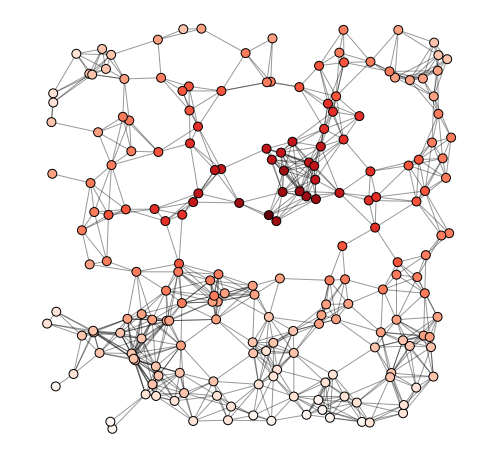

In [95]:
#Random geometric graph
import networkx as nx
import matplotlib.pyplot as plt

G=nx.random_geometric_graph(200,0.125)
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=p.values(),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


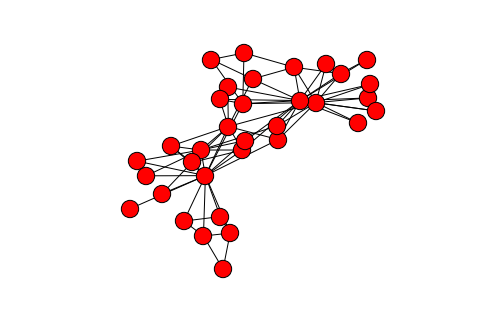

In [96]:
#Karate Club

import networkx as nx
G=nx.karate_club_graph()
print("Node Degree")
for v in G:
    print('%s %s' % (v,G.degree(v)))
nx.draw(G)

In [ ]:
import string
import networkx as nx


def minard_graph():
    data1="""\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2="""\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3="""\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities="""\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c={}
    for line in cities.split('\n'):
        x,y,name=line.split(',')
        c[name]=(float(x),float(y))

    g=[]

    for data in [data1,data2,data3]:
        G=nx.Graph()
        i=0
        G.pos={} # location
        G.pop={} # size
        last=None
        for line in data.split('\n'):
            x,y,p,r,n=line.split(',')
            G.pos[i]=(float(x),float(y))
            G.pop[i]=int(p)
            if last is None:
                last=i
            else:
                G.add_edge(i,last,{r:int(n)})
                last=i
            i=i+1
        g.append(G)

    return g,c

if __name__ == "__main__":

    (g,city)=minard_graph()

    try:
        import matplotlib.pyplot as plt
        plt.figure(1,figsize=(11,5))
        plt.clf()
        colors=['b','g','r']
        for G in g:
            c=colors.pop(0)
            node_size=[int(G.pop[n]/300.0) for n in G]
            nx.draw_networkx_edges(G,G.pos,edge_color=c,width=4,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=node_size,node_color=c,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=5,node_color='k')

        for c in city:
            x,y=city[c]
            plt.text(x,y+0.1,c)
        plt.savefig("napoleon_russian_campaign.png")
    except ImportError:
        pass


In [92]:
from networkx import *
import sys

n=10 # 10 nodes
m=20 # 20 edges

G=gnm_random_graph(n,m)

# some properties
print("node degree clustering")
for v in nodes(G):
    print('%s %d %f' % (v,degree(G,v),clustering(G,v)))

# print the adjacency list to terminal
try:
    write_adjlist(G,sys.stdout)
except TypeError: # Python 3.x
    write_adjlist(G,sys.stdout.buffer)

node degree clustering
0 5 0.600000
1 2 1.000000
2 3 0.333333
3 6 0.400000
4 6 0.400000
5 4 0.166667
6 4 0.166667
7 4 0.666667
8 2 0.000000
9 4 0.666667
#/Users/theophilus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py -f /Users/theophilus/Library/Jupyter/runtime/kernel-33d1e62c-d934-4ab5-8bc8-14869894a18e.json
# GMT Sat Nov  7 23:39:10 2015
# gnm_random_graph(10,20)
0 9 2 3 4 7
1 4 5
2 6 7
3 4 6 7 8 9
4 5 7 9
5 8 6
6 9
7
8
9


In [ ]:
import networkx as nx
import numpy as np
from enthought.mayavi import mlab

# some graphs to try
#H=nx.krackhardt_kite_graph()
#H=nx.Graph();H.add_edge('a','b');H.add_edge('a','c');H.add_edge('a','d')
#H=nx.grid_2d_graph(4,5)
H=nx.cycle_graph(20)

# reorder nodes from 0,len(G)-1
G=nx.convert_node_labels_to_integers(H)
# 3d spring layout
pos=nx.spring_layout(G,dim=3)
# numpy array of x,y,z positions in sorted node order
xyz=np.array([pos[v] for v in sorted(G)])
# scalar colors
scalars=np.array(G.nodes())+5

mlab.figure(1, bgcolor=(0, 0, 0))
mlab.clf()

pts = mlab.points3d(xyz[:,0], xyz[:,1], xyz[:,2],
                    scalars,
                    scale_factor=0.1,
                    scale_mode='none',
                    colormap='Blues',
                    resolution=20)

pts.mlab_source.dataset.lines = np.array(G.edges())
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))

mlab.savefig('mayavi2_spring.png')
# mlab.show() # interactive window

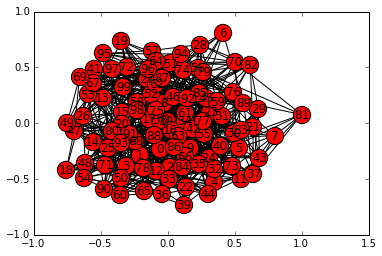

In [93]:
#endos-renyi random graphs
er = nx.erdos_renyi_graph(100,0.15)
nx.draw_networkx(er)
plt.show()

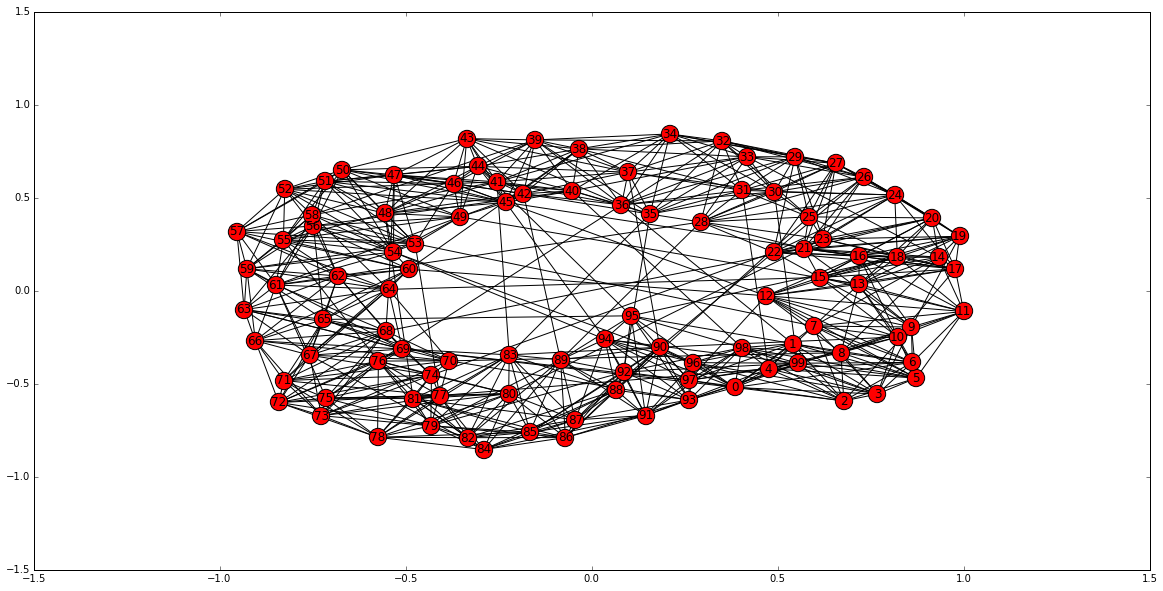

In [49]:
#watts_strogatz
plt.figure(figsize=(20,10))
wt = nx.watts_strogatz_graph(100, 15,0.1)
nx.draw_networkx(wt)

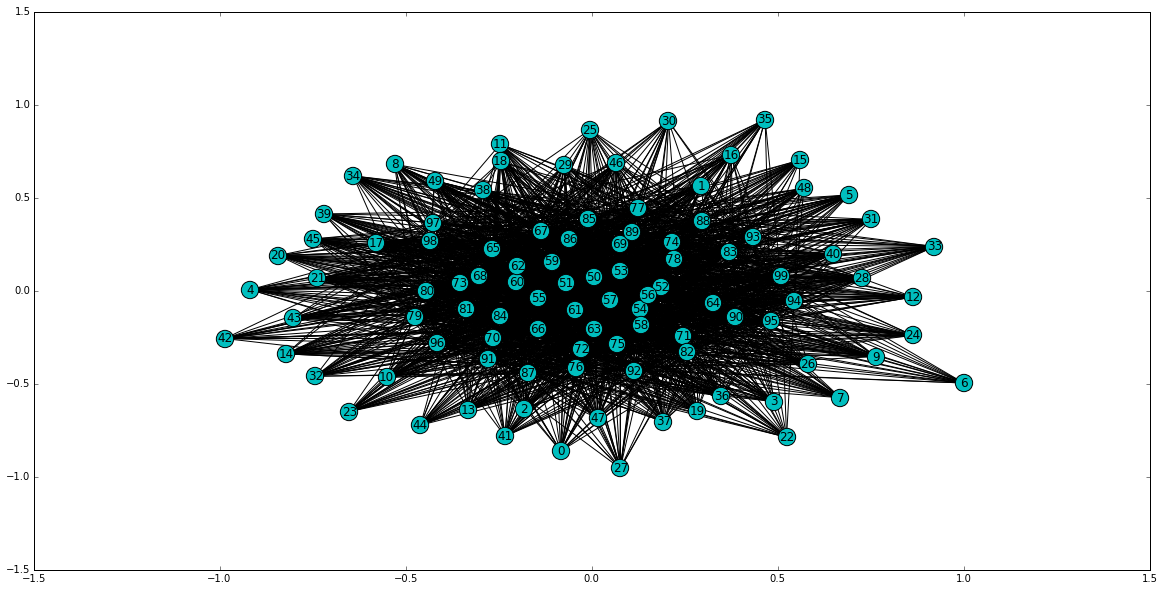

In [214]:
#barabasi-albert
plt.figure(figsize=(20,10))
ba = nx.barabasi_albert_graph(100,50)
nx.draw_networkx(ba,node_color='c')


In [ ]:
import csv
import networkx as nx

In [ ]:
sub = G.subgraph(ba)
nx.draw_networkx(sub)

In [ ]:
list = [ 1,3,4,5,7]
for i in list:
    if i >=3:
        print i

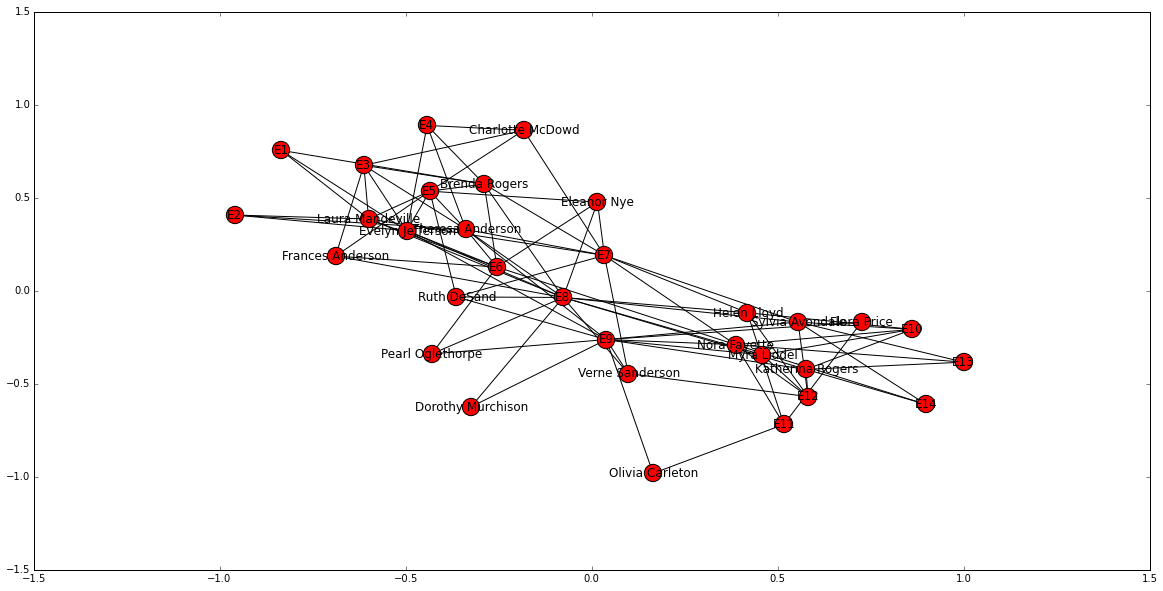

In [51]:
#southern women graph , what clubs they belong to in 1930's
#Return Davis Southern women social network.
#This is a bipartite graph.
plt.figure(figsize=(20,10))
dswg = nx.davis_southern_women_graph()
nx.draw_networkx(dswg)

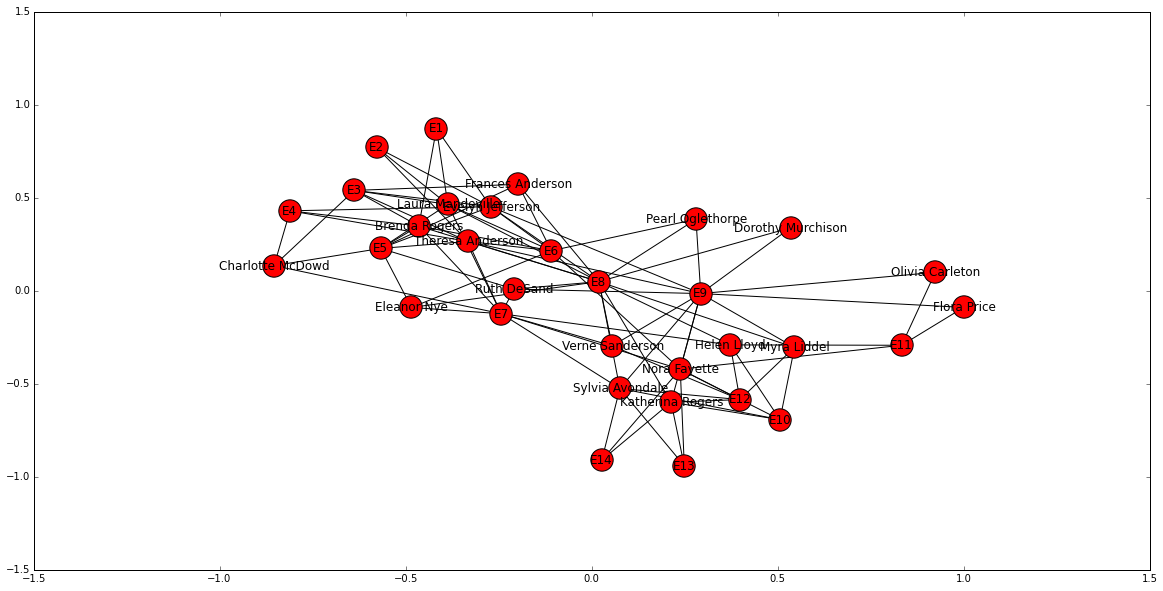

In [46]:
plt.figure(figsize=(20,10))
nx.draw_networkx(dswg,node_size=500)

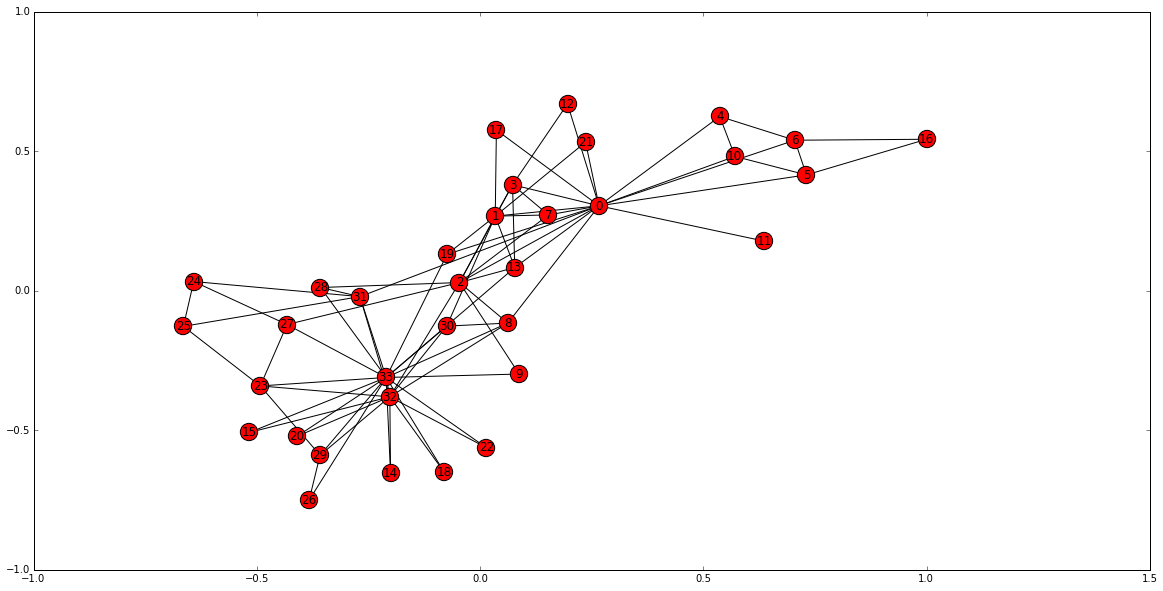

In [47]:
plt.figure(figsize=(20,10))
kcg = nx.karate_club_graph()
nx.draw_networkx(kcg)

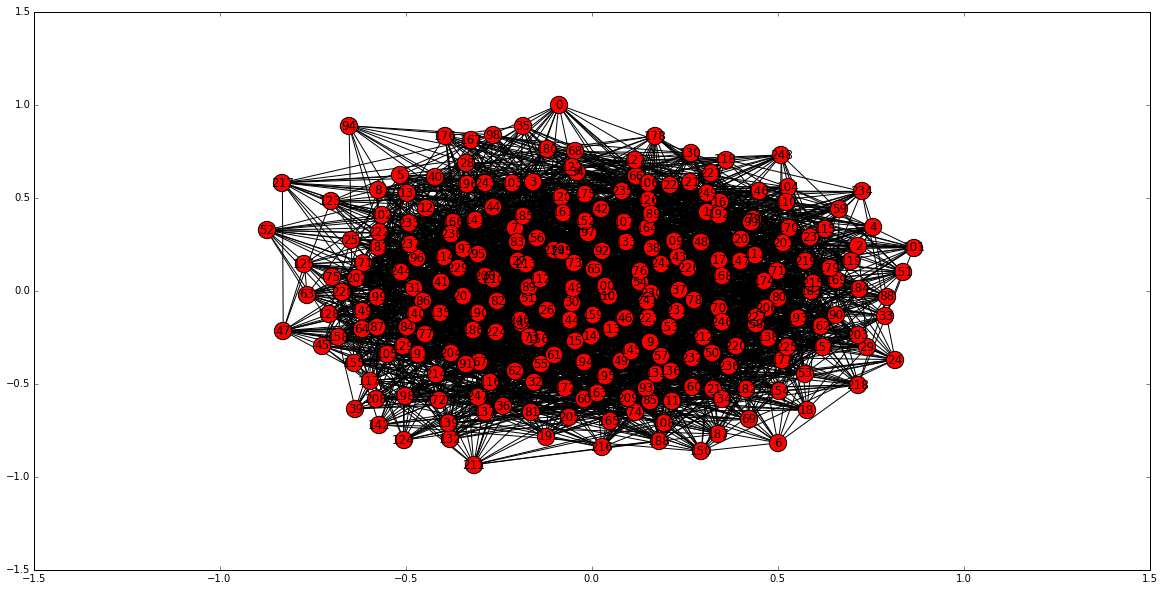

In [59]:
#endos_renyi graph
plt.figure(figsize=(20,10))
ER = nx.erdos_renyi_graph(250,.1)
nx.draw_networkx(ER)

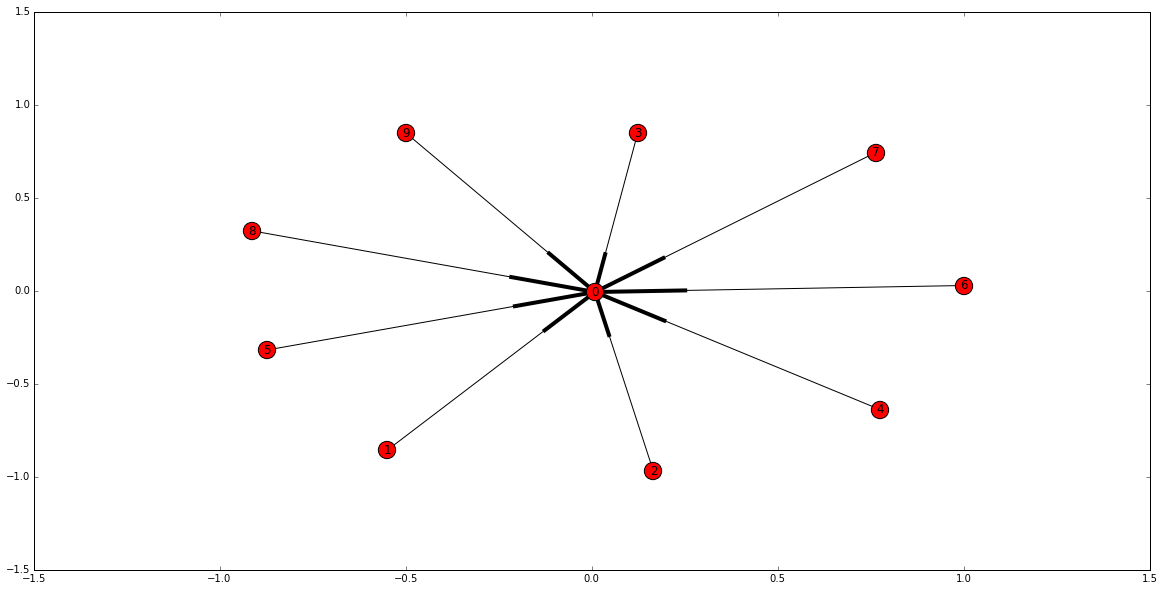

In [60]:
plt.figure(figsize=(20,10))
gnr = nx.gnr_graph(10,1)
nx.draw_networkx(gnr)

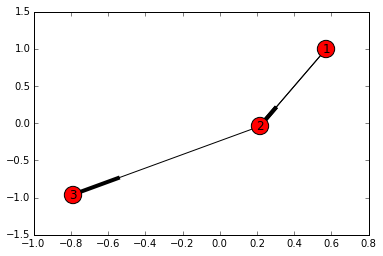

In [81]:
#multigraph
MK = nx.MultiDiGraph()
MK.add_path([1,2,3])
MK.add_edge(1,2)
nx.draw_networkx(MK)

In [82]:
MK.edges()

[(1, 2), (1, 2), (2, 3)]

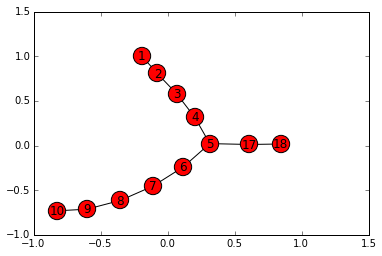

In [87]:
#centrality is a property of a node
Example = nx.Graph()
Example.add_path([1,2,3,4,5,6,7,8,9,10])
Example.add_path([5,17,18])
nx.draw_networkx(Example)

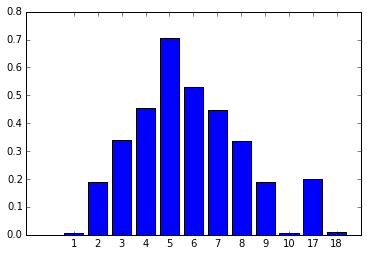

In [89]:
BC = nx.communicability_betweenness_centrality(Example)
plt.bar(range(len(BC)),BC.values(),align='center')
plt.xticks(range(len(BC)),BC.keys())
plt.show()

In [100]:
list = [x for x in range(10)]
list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [104]:
list[-5:]

[5, 6, 7, 8, 9]

In [102]:
list[3:]

[3, 4, 5, 6, 7, 8, 9]

In [105]:
list[:5]

[0, 1, 2, 3, 4]

In [106]:
dic = {0:'1',1:'2',2:'3'}
dic

{0: '1', 1: '2', 2: '3'}

In [109]:
list[5]

5

In [115]:
dic[2]

'3'

In [118]:
for i in dic:
    print i

0
1
2


In [119]:
G.add_edge('1','2', capacity=80.0)
G.add_edge('1','3', capacity=70.0)
G.add_edge('1','4', capacity=70.0)
G.add_edge('2','5', capacity=40.0)
G.add_edge('3','5', capacity=50.0)
G.add_edge('3','6', capacity=30.0)
G.add_edge('4','6', capacity=50.0)
G.add_edge('5','7', capacity=40.0)
G.add_edge('6','7', capacity=70.0)

173790

In [120]:
g = nx.DiGraph()

In [121]:
g.add_nodes_from([1,2,3,4,5,6,7])

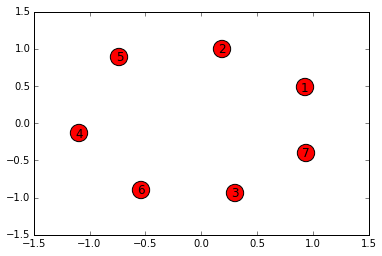

In [122]:
nx.draw_networkx(g)

In [123]:
g.add_edges_from([(1,2),(1,3),(1,4),(2,5),(3,5),(3,6),(4,6),(5,7),(6,7)])

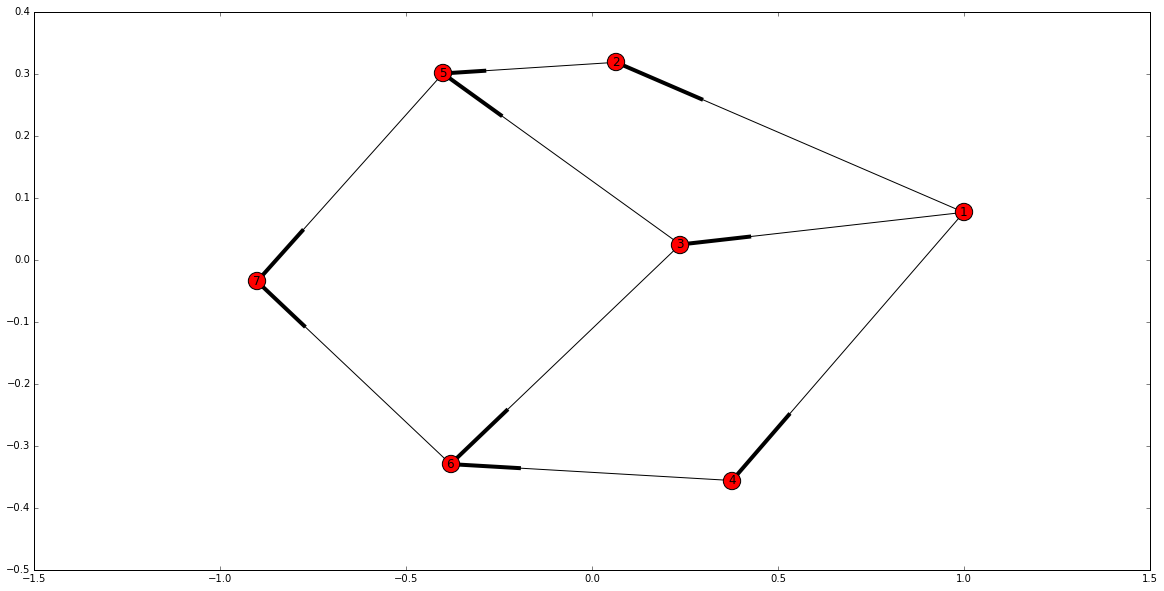

In [129]:
plt.figure(figsize=(20,10))
nx.draw_networkx(g)

In [131]:
nx.average_shortest_path_length(g)

0.5238095238095238

In [133]:
g.degree()

{1: 3, 2: 2, 3: 3, 4: 2, 5: 3, 6: 3, 7: 2}

In [134]:
g.in_degree()

{1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2}

In [135]:
g.out_degree()

{1: 3, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 0}

In [142]:
g.neighbors(3)

[5, 6]

In [146]:
g.has_predecessor(1,3)

False

In [152]:
pair = nx.out_degree_centrality(g)
pair

{1: 0.5,
 2: 0.16666666666666666,
 3: 0.3333333333333333,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666,
 7: 0.0}

In [153]:
nx.in_degree_centrality(g)

{1: 0.0,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.3333333333333333,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

None


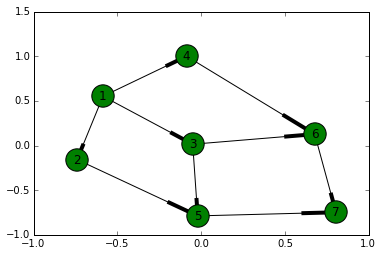

In [166]:
print nx.draw_networkx(g,node_size=500,node_color='g')

In [167]:
g.number_of_edges()

9

In [168]:
g.number_of_nodes()

7

In [169]:
g.is_multigraph()

False

In [170]:
g.is_directed()

True

In [171]:
g.remove_edge(2,5)

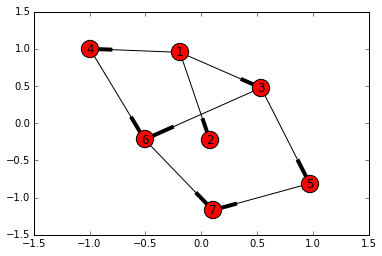

In [172]:
nx.draw_networkx(g)

In [174]:
print g.add_edge(2,5)

None


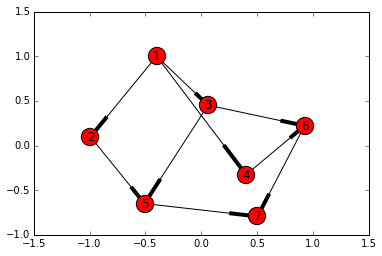

In [175]:
nx.draw_networkx(g)

In [176]:
g.size()

9

In [177]:
G=nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_cycle([0,1,2,3])
G.add_cycle([10,11,12],weight=7)

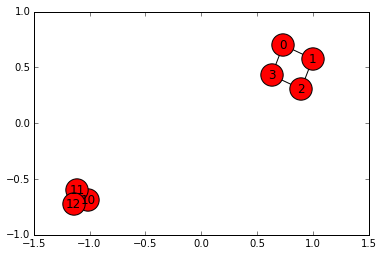

In [180]:
nx.draw_networkx(G,node_size=500)

In [182]:
nx.find_cycle(G)

[(0, 1), (1, 2), (2, 3), (3, 0)]

In [184]:
print nx.adjacency_matrix(G)

  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1
  (4, 5)	7
  (4, 6)	7
  (5, 4)	7
  (5, 6)	7
  (6, 4)	7
  (6, 5)	7


In [190]:
print [p for p in nx.all_shortest_paths(G,0,2)]

[[0, 1, 2], [0, 3, 2]]


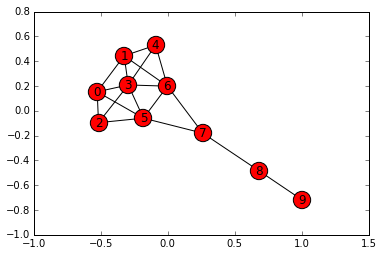

In [194]:
kk = nx.krackhardt_kite_graph()
nx.draw_networkx(kk)

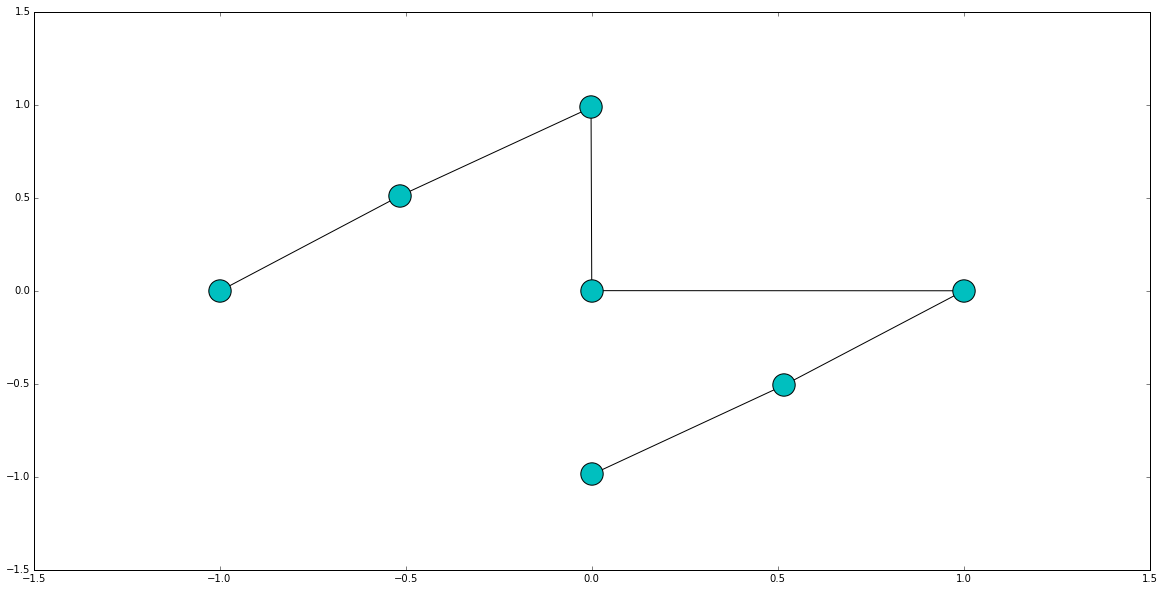

In [252]:
import networkx as nx
import matplotlib.pyplot as pltt
%matplotlib inline

plt.figure(figsize=(20,10))
siameh =nx.grid_2d_graph(3,3)  #3x3 grid

pos=nx.spring_layout(siameh,iterations=100)

siameh.remove_node((2,1))
siameh.remove_node((0,1))

siameh.add_path([(2,0),(1,1)])
siameh.add_path([(2,2),(1,1)])

siameh.remove_edge((1,0),(1,1))
siameh.remove_edge((1,1),(1,2))

nx.draw_networkx(siameh,pos,node_color='c',node_size=500,with_labels=False)
plt.figure(figsize=(10,10))


In [253]:
1

1

In [254]:
help(nx.algorithms)

Help on package networkx.algorithms in networkx:

NAME
    networkx.algorithms

FILE
    /Users/theophilus/anaconda/lib/python2.7/site-packages/networkx/algorithms/__init__.py

PACKAGE CONTENTS
    approximation (package)
    assortativity (package)
    bipartite (package)
    block
    boundary
    centrality (package)
    chordal (package)
    clique
    cluster
    coloring (package)
    community (package)
    components (package)
    connectivity (package)
    core
    cycles
    dag
    distance_measures
    distance_regular
    dominance
    dominating
    euler
    flow (package)
    graphical
    hierarchy
    hybrid
    isolate
    isomorphism (package)
    link_analysis (package)
    link_prediction
    matching
    minors
    mis
    mst
    operators (package)
    richclub
    shortest_paths (package)
    simple_paths
    smetric
    swap
    traversal (package)
    tree (package)
    triads
    vitality

SUBMODULES
    all
    astar
    attracting
    betweenness
    betw

In [255]:
sorted(nx.degree(G).values())

[2, 2, 2, 2, 2, 2, 2]

In [258]:
print google_matrix(G,alpha=0.95)

[[ 0.00714286  0.48214286  0.00714286  0.48214286  0.00714286  0.00714286
   0.00714286]
 [ 0.48214286  0.00714286  0.48214286  0.00714286  0.00714286  0.00714286
   0.00714286]
 [ 0.00714286  0.48214286  0.00714286  0.48214286  0.00714286  0.00714286
   0.00714286]
 [ 0.48214286  0.00714286  0.48214286  0.00714286  0.00714286  0.00714286
   0.00714286]
 [ 0.00714286  0.00714286  0.00714286  0.00714286  0.00714286  0.48214286
   0.48214286]
 [ 0.00714286  0.00714286  0.00714286  0.00714286  0.48214286  0.00714286
   0.48214286]
 [ 0.00714286  0.00714286  0.00714286  0.00714286  0.48214286  0.48214286
   0.00714286]]
